In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics
import graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## TASK 1: Load the dataset into python using panda read_csv

For the current Abalone dataset, all physical features data are in numerical format (either float64 or int64).

No need to do any datatype conversion

In [ ]:
abalone = pd.read_csv('sample_data/demo-abalone_027.csv')

print(abalone[0:10])

  Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0    I         0.440     0.340   0.105       0.3690         0.1640   
1    F         0.590     0.460   0.145       0.9905         0.4530   
2    F         0.430     0.340   0.110       0.3820         0.1540   
3    I         0.535     0.415   0.150       0.5765         0.3595   
4    M         0.660     0.495   0.195       1.6275         0.5940   
5    I         0.410     0.320   0.095       0.2905         0.1410   
6    I         0.305     0.245   0.075       0.1560         0.0675   
7    M         0.715     0.550   0.190       2.0045         1.0465   
8    I         0.540     0.400   0.145       0.7570         0.3150   
9    I         0.275     0.200   0.065       0.1165         0.0565   

   VisceraWeight  ShellWeight  Rings  
0         0.0800       0.1015      5  
1         0.2205       0.2750      8  
2         0.0955       0.1090      8  
3         0.1350       0.2250      8  
4         0.3595       0.4850     

### TASK 2:
- Plot the percentage of the instances in each output class
- Store the graphic in a file called abalone-classes.gif

**QUESTION: Which metric is more appropriate to use to evaluate the performance?**


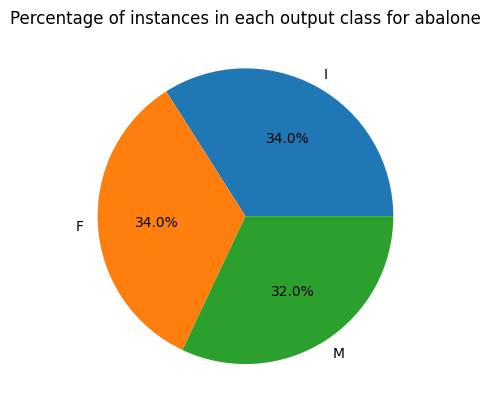

In [ ]:
#  Plot percentage of instances in each species for abalone
output_classes = abalone['Type'].value_counts()
plt.pie(output_classes, labels=output_classes.index, autopct='%1.1f%%')
plt.title("Percentage of instances in each output class for abalone")
plt.savefig(f'abalone-classes.png') # save as .png file
plt.show()

### TASK 3: Split the dataset using train test split using the default parameter values.
Default: train = 75%, test = 25%


In [ ]:
# Convert the abalone dataframe into an nd array to be fed to the model
abalone = np.array(abalone)

# Split the abalone dataset into train and test sets
A_X = abalone[:, 1:9]
A_y = abalone[:, 0]
A_X_train, A_X_test, A_y_train, A_y_test = train_test_split(A_X, A_y, random_state=None)

### TASK 4 & 5:
#### Train and test 4 different classifiers:
- Base-DT: a Decision Tree with the default parameters
- Top-DT: a better performing Decision Tree found using a gridsearch
- Base-MLP: a Multi-Layered Perceptron with 2 hidden layers of 100+100 neurons, sigmoid/logisti, stochastic gradient descent, and default values for the rest of the parameters.
- Top-MLP: a better performing Multi-Layered Perceptron found using grid search

#### For each of the 4 classifiers, append the performance metrics into the penguin-performance.txt file
- a clear separator, a string clearly describing the model( model name + hyper-parameter values).
- confusion matrix
- precision, recall, and F1-measure for each class
- accuracy, macro-average F1 and weighted-average F1 of the model


In [ ]:
epochs = 6

accuracies_basedt = []
accuracies_topdt = []
accuracies_basemlp = []
accuracies_topmlp = []

macro_averages_f1_basedt = []
macro_averages_f1_topdt = []
macro_averages_f1_basemlp = []
macro_averages_f1_topmlp = []

weighted_averages_f1_basedt = []
weighted_averages_f1_topdt = []
weighted_averages_f1_basemlp = []
weighted_averages_f1_topmlp = []


with open(f"abalone-performance.txt", "w") as out:
  out.write("********************* Abalone Performance ********************* \n\n")

#### TRAIN BASE-DT MODEL
##### Hyperparameters: criterion = "gini", max_depth = None (go to leave nodes), min_samples_split = 2

***Note:*** The model being re-instantiated in very iteration can lead to a potential issue. That is the model is trained from scratch in each iteration without retaining the learning from the previous iteration.

***Solution:*** Instatiate the model outside of the for loop

In [ ]:
# Instantiate the model
basedt_model = tree.DecisionTreeClassifier()

for _ in range(0, epochs):
  # Fit the model with the train dataset
  basedt_model.fit(A_X_train, A_y_train)

  # Visualize the decision tree with a limited depth the output the graphic tree to file using graphviz
  dot_data = tree.export_graphviz(basedt_model, out_file=None,
      feature_names=['LongestShell', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'],
      class_names=['F', 'M','I'],
      filled=True, rounded=True)
  graph = graphviz.Source(dot_data)
  graph.render(f"BaseDT_Tree{_+1}")

  # After training, predict the dataset
  A_y_pred = basedt_model.predict(A_X_test)

  # Append performance metrics to a list for TASK 5
  accuracies_basedt.append(accuracy_score(A_y_test, A_y_pred))
  macro_averages_f1_basedt.append(f1_score(A_y_test, A_y_pred, average='macro'))
  weighted_averages_f1_basedt.append(f1_score(A_y_test, A_y_pred, average='weighted'))

  # Append output of Base-DT Model to file
  with open(f"abalone-performance.txt", "a") as out:
      out.write(f"********************* Base-DT Model (iteration {_+1}) *********************\n")
      out.write(f"Model: Base-DT Model\n")
      out.write(f"Hyperparameters (default):\n")
      out.write(f"criterion: gini, max_depth: None, min_samples_split: 2\n")
      out.write("\n")
      out.write(f"Confusion Matrix: \n{confusion_matrix(A_y_test, A_y_pred)}\n")
      out.write("\n")
      out.write(f"Classification Report: \n{classification_report(A_y_test, A_y_pred)}\n")


#### TRAIN TOP-DT MODEL
##### Hyperparameters: Best hyperarameters found using GridSearchCV, values vary for each epoch

***Note:*** Re-instantiating the model in each iteration might not capture the learning progress across epochs, especially in the context of hyperparameter tuning and model training.

***Solution:*** Maintain the same model instance and retrain it with different hyperparameters in each iteration



In [ ]:
# The parameters we are experiencing with
parameters = {'criterion': ('gini', 'entropy'), 'max_depth': [5, 15, None], 'min_samples_split': [2, 10, 20]}

# Instantiate the model
topdt_model = tree.DecisionTreeClassifier()

for _ in range(0, epochs):

  # Fit the model with the training dataset to find the best hyperparameters
  grid_search = GridSearchCV(topdt_model, parameters)
  grid_search.fit(A_X_train, A_y_train)

  # Extract best hyperparameters
  best_params = grid_search.best_params_

  # Update the model with the best hyperparameters found
  topdt_model.set_params(
        criterion=best_params["criterion"],
        max_depth=best_params["max_depth"],
        min_samples_split=best_params["min_samples_split"]
    )
  topdt_model.fit(A_X_train, A_y_train)

  # Output the graphic tree to file using graphviz
  dot_data_TopDT = tree.export_graphviz(topdt_model, out_file=None,
      feature_names=['LongestShell', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'],
      class_names=['F', 'M','I'],
      filled=True, rounded=True)
  graph = graphviz.Source(dot_data_TopDT)
  graph.render(f"TopDT_Tree{_+1}")

  # After training, predict the test dataset
  A_y_pred = topdt_model.predict(A_X_test)

  # Append performance metrics to a list for TASK 5
  accuracies_topdt.append(accuracy_score(A_y_test, A_y_pred))
  macro_averages_f1_topdt.append(f1_score(A_y_test, A_y_pred, average='macro'))
  weighted_averages_f1_topdt.append(f1_score(A_y_test, A_y_pred, average='weighted'))

  # Append output of Top-DT Model to file
  with open(f"abalone-performance.txt", "a") as out:
      out.write(f"********************* Top-DT Model (iteration {_+1}) *********************\n")
      out.write(f"Model name: Top-DT Model\n")
      out.write(f"Best Hyperparameters:\n")
      out.write(f"{best_params}\n")
      out.write("\n")
      out.write(f"Confusion Matrix: \n{confusion_matrix(A_y_test, A_y_pred)}\n")
      out.write("\n")
      out.write(f"Classification Report: \n{classification_report(A_y_test, A_y_pred)}\n")

#### Train Base-MLP Model
##### Hyperparameters (default): hidden_layer_sizes=(100, 100, ), activation='logistic', solver='sgd'

***Note:*** The model being re-instantiated in very iteration can lead to a potential issue. That is the model is trained from scratch in each iteration without retaining the learning from the previous iteration.

***Warning:*** "UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior."

***Solution:***
- Instatiate the model outside of the for
- Warning arises when some labels in the test set have no predicted samples, leading to precision and F-score being ill-defined and set to 0.0. To handle this warning, utilize the zero_division parameter to control the behavior when the division is zero.



In [ ]:
 # Instantiate the model with default value
basemlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd')

for _ in range(0, epochs):
  # Fit the model with the training dataset
  basemlp_model.fit(A_X_train, A_y_train)

  # After training, predict the test dataset
  A_y_pred = basemlp_model.predict(A_X_test)

  # Append performance metrics to a list for TASK 5
  accuracies_basemlp.append(accuracy_score(A_y_test, A_y_pred))
  macro_averages_f1_basemlp.append(f1_score(A_y_test, A_y_pred, average='macro'))
  weighted_averages_f1_basemlp.append(f1_score(A_y_test, A_y_pred, average='weighted'))

  with open(f"abalone-performance.txt", "a") as out:
      out.write(f"********************* Base-MLP Model (iteration {_+1}) *********************\n")
      out.write(f"Model name: Base-MLP Model\n")
      out.write(f"Hyperparameters (default):\n")
      out.write(f"hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd'\n")
      out.write("\n")
      out.write(f"Confusion Matrix: \n{confusion_matrix(A_y_test, A_y_pred)}\n")
      out.write("\n")
      out.write(f"Classification Report: \n{classification_report(A_y_test, A_y_pred, zero_division=1)}\n")

#### Train TOP-MLP Model
##### Hyperparameters: Best hyperarameters found using GridSearchCV, values vary for each epoch

***Note:*** Re-instantiating the model in each iteration might not capture the learning progress across epochs, especially in the context of hyperparameter tuning and model training.

***Waning:*** Maximum iterations (200) reached and the optimization hasn't converged yet.warnings.warn(

***Solution:***
- To ensure the model maintains its learning across epochs and retains the best hyperparameters found, we'll retrain the same model instance using the updated hyperparameters without re-instantiating the model in each iteration.

- Increase the max_iter parameter in the MLPClassifier to allow the optimization process to run for more iterations, giving it a better chance to converge. OR Adjusting the learning rate to control the step size during optimization. Lowering the learning rate helps the algorithm converge within fewer iterations.

In [ ]:
# The parameters we are experiencing with
parameters = {'activation': ('logistic', 'tanh', 'relu'), 'hidden_layer_sizes': [(30, 50), (50, 25, 10)], 'solver': ['adam', 'sgd']}

# Initialize the model
topmlp_model = MLPClassifier()

for _ in range(0, epochs):
  # Instantiate the model using GridSearchCV
  grid_search = GridSearchCV(topmlp_model, parameters)

  # Fit the training dataset to find the best hyperparameters
  grid_search.fit(A_X_train, A_y_train)

  # Extract the best hyperparameters found
  best_params = grid_search.best_params_

  # Redefine the model with the best hyperparameters suggested from GridSearchCV
  topmlp_model.set_params(hidden_layer_sizes=best_params["hidden_layer_sizes"], activation=best_params["activation"], solver=best_params["solver"])
  topmlp_model.fit(A_X_train, A_y_train)

  # After training, predict the dataset
  A_y_pred = topmlp_model.predict(A_X_test)

  # Append performance metrics to a list for TASK 5
  accuracies_topmlp.append(accuracy_score(A_y_test, A_y_pred))
  macro_averages_f1_topmlp.append(f1_score(A_y_test, A_y_pred, average='macro'))
  weighted_averages_f1_topmlp.append(f1_score(A_y_test, A_y_pred, average='weighted'))


  with open(f"abalone-performance.txt", "a") as out:
    out.write(f"********************* Top-MLP Model (iteration {_+1}) *********************\n")
    out.write(f"Model name: Top-MLP Model\n")
    out.write(f"Best Hyperparameters:\n")
    out.write(f"{best_params}\n")
    out.write("\n")
    out.write(f"Confusion Matrix: \n{confusion_matrix(A_y_test, A_y_pred)}\n")
    out.write("\n")
    out.write(f"Classification Report: \n{classification_report(A_y_test, A_y_pred, zero_division=1)}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
# Append averages in performance files
with open(f"abalone-performance.txt", "a") as out:
  out.write(f"********************* Evaluation after running multiple epochs *********************\n")
  out.write(f"Accuracy ------------------------ \n")
  out.write(f"BaseDT-Model = {statistics.mean(accuracies_basedt)}\n")
  out.write(f"TopDT-Model = {statistics.mean(accuracies_topdt)}\n")
  out.write(f"BaseMLP-Model = {statistics.mean(accuracies_basemlp)}\n")
  out.write(f"TopMLP-Model = {statistics.mean(accuracies_topmlp)}\n \n")

  out.write(f"Variance ------------------------ \n")
  out.write(f"BaseDT-Model = {statistics.stdev(accuracies_basedt)}\n")
  out.write(f"TopDT-Model = {statistics.stdev(accuracies_topdt)}\n")
  out.write(f"BaseMLP-Model = {statistics.stdev(accuracies_basemlp)}\n")
  out.write(f"TopMLP-Model = {statistics.stdev(accuracies_topmlp)}\n \n")

  out.write(f"Average macro-average F1 ------------------------ \n")
  out.write(f"BaseDT-Model = {statistics.mean(macro_averages_f1_basedt)}\n")
  out.write(f"TopDT-Model = {statistics.mean(macro_averages_f1_topdt)}\n")
  out.write(f"BaseMLP-Model = {statistics.mean(macro_averages_f1_basemlp)}\n")
  out.write(f"TopMLP-Model = {statistics.mean(macro_averages_f1_topmlp)}\n \n")

  out.write(f"Average weighted-average F1 ------------------------ \n")
  out.write(f"BaseDT-Model = {statistics.mean(weighted_averages_f1_basedt)}\n")
  out.write(f"TopDT-Model = {statistics.mean(weighted_averages_f1_topdt)}\n")
  out.write(f"BaseMLP-Model = {statistics.mean(weighted_averages_f1_basemlp)}\n")
  out.write(f"TopMLP-Model = {statistics.mean(weighted_averages_f1_topmlp)}\n \n")